In [1]:
import numpy as np
import cv2, matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline
print(os.getcwd())

/Users/yuta/Documents/Australia_doc/UNSW/Lesson/Comp9517/Assignment1


4646 1800
(1548, 1800, 3)
(1549, 1800, 3)
(1549, 1800, 3)


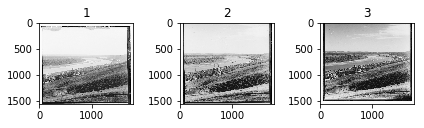

In [3]:
#z5186797 Yuta Sato
#changed name for ease 00549u.jpg -> s6.jpg
def read_img(name_i):
    #imread (b,g,r)
    img = cv2.imread(name_i)
    #cvtColor swipe b,g,r -> r,g,b
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

img = read_img('DataSamples/s6.jpg')
#img = removeBorder(img)
h, w, rgb = img.shape
print(h,w)
#plt.imshow(img,cmap = 'gray')
images = []
start_point = 0
for i in range(3):
    #print(i)
    #print(int(start_point + h*i/3))
    images.append(img[0 + start_point:int(h * (i + 1)/3)])
    start_point = int(h * (i + 1) /3)
    print(images[i].shape)
plt.subplot(1,3,1),plt.imshow(images[0],cmap = 'gray'),plt.title('1')
plt.subplot(1,3,2),plt.imshow(images[1],cmap = 'gray'),plt.title('2')
plt.subplot(1,3,3),plt.imshow(images[2],cmap = 'gray'),plt.title('3')
plt.tight_layout()
plt.savefig("f1.png")
plt.show()

(1548, 1800)
[[  1.         0.         4.405257]
 [  0.         1.       -10.045528]]
0.80891962104892
[[  1.         0.         9.018634]
 [  0.         1.       -46.824463]]
0.6863295258603613
(1548, 1800) (1548, 1800) (1548, 1800)
(1548, 1800, 3)


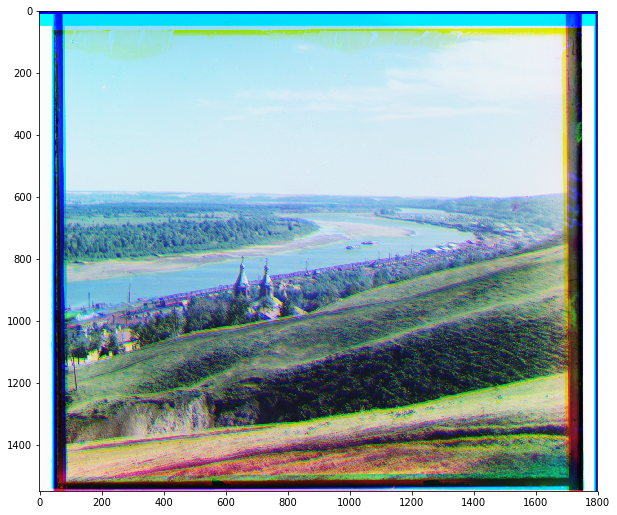

In [4]:
# Task1
im1 = images[0]
im2 = images[1]
im3 = images[2]

im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
im3_gray = cv2.cvtColor(im3,cv2.COLOR_BGR2GRAY)
# cvtColor change size
print(im1_gray.shape)
# Find size of image1
def align_image(im1,im2):
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
    sz = im1_gray.shape
    # Define 2x3 or 3x3 matrices and initialize the matrix to identity
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    warp_mode = cv2.MOTION_TRANSLATION
    # Specify the number of iterations.
    number_of_iterations = 5000;
    # Specify the threshold of the increment
    # in the correlation coefficient between two iterations
    termination_eps = 1e-10;
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,None,1)
    print(warp_matrix)
    print(cc)
    #print(warp_matrix)
    offset = (warp_matrix[0][2],warp_matrix[1][2])
    #print(offset)
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
    return im2_aligned

im2_aligned = align_image(images[0], images[1])
im3_aligned = align_image(images[0], images[2])
print(im1_gray.shape,im2_aligned.shape,im3_aligned.shape)
#sys_image = cv2.merge((im3_aligned,im2_aligned,im1_gray))
#im1_gray = cv2.resize(im1_gray, (im2_aligned.shape[1], im2_aligned.shape[0]))
im2_aligned = cv2.resize(im2_aligned, (im1_gray.shape[1], im1_gray.shape[0]))
im3_aligned = cv2.resize(im3_aligned, (im1_gray.shape[1], im1_gray.shape[0]))
sys_image = cv2.merge((im1_gray,im2_aligned,im3_aligned))
print(sys_image.shape)
sys_image = cv2.cvtColor(sys_image,cv2.COLOR_BGR2RGB)
sys_image = sys_image.astype(np.uint8)
#cv2.imwrite('f2.jpg', sys_image)
plt.figure(figsize = (10,10))
plt.imshow(sys_image,vmin = 0,vmax = 255)
plt.savefig("ff1.jpg",bbox_inches='tight')

(1548, 1800, 3)


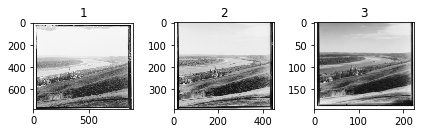

In [5]:
numbers = 3
level = 6
grays = []
for i in range(3):
    grays.append(images[i])
#plt.imshow(grays[0],cmap = 'gray',vmin = 0,vmax = 255)

def make_pyrmid1(gray,level):
    G = gray.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpA.append(G)
    return gpA

def align_image1(im1,im2):
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
    sz = im1_gray.shape
    warp_mode = cv2.MOTION_TRANSLATION
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    number_of_iterations = 5000;
    termination_eps = 1e-10;
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,None,1)
    offset = (warp_matrix[0][2],warp_matrix[1][2])
    #print(offset)
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
    return warp_matrix, im2_aligned

gaussian_pyr_1 = make_pyrmid1(grays[0], level)
gaussian_pyr_2 = make_pyrmid1(grays[1], level)
gaussian_pyr_3 = make_pyrmid1(grays[2], level)

print(gaussian_pyr_1[0].shape)
        
plt.subplot(1,3,1),plt.imshow(gaussian_pyr_1[1],cmap = 'gray'),plt.title('1')
plt.subplot(1,3,2),plt.imshow(gaussian_pyr_2[2],cmap = 'gray'),plt.title('2')
plt.subplot(1,3,3),plt.imshow(gaussian_pyr_3[3],cmap = 'gray'),plt.title('3')
plt.tight_layout()
plt.savefig("f3.jpg")
plt.show()

(194, 225) (194, 225)
(1548, 1800, 3)


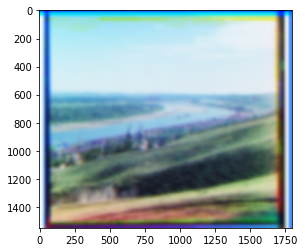

In [6]:
# level = 2
# im2_aligned = align_image(gaussian_pyr_1[level], gaussian_pyr_2[level])
# im3_aligned = align_image(gaussian_pyr_1[level], gaussian_pyr_3[level])
# im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
# im3_aligned = cv2.cvtColor(im3_aligned,cv2.COLOR_BGR2GRAY)
# sys_image = cv2.merge((im3_aligned,im2_aligned,gaussian_pyr_1[level]))
# print(sys_image.shape)
# plt.imshow(sys_image,vmin = 0,vmax = 255)
# we need offset * times, right ?? and if we use moduel we cannot start from immediate result.
warp_matrix2,im2_aligned = align_image1(gaussian_pyr_1[3],gaussian_pyr_2[3])
warp_matrix3,im3_aligned = align_image1(gaussian_pyr_1[3],gaussian_pyr_3[3])
print(im2_aligned.shape,im3_aligned.shape)
im1_gray = cv2.cvtColor(gaussian_pyr_1[3],cv2.COLOR_BGR2GRAY)
sys_image = cv2.merge((im1_gray,im2_aligned,im3_aligned))
for i in range(level - 1 , 0, -1):
    sys_image = cv2.pyrUp(sys_image)
    #print(sys_image.shape)
    sys_image = cv2.resize(sys_image, (gaussian_pyr_1[i - 1].shape[1], gaussian_pyr_1[i - 1].shape[0]))
print(sys_image.shape)
sys_image = cv2.cvtColor(sys_image,cv2.COLOR_BGR2RGB)
plt.imshow(sys_image,vmin = 0,vmax = 255)
#cv2.imwrite('f4.jpg', sys_image)
plt.savefig("ff2.jpg",bbox_inches='tight')

#each pyramid from bottom get offset(move)
#it 2times then pass to high level then make alignment pic2,3 then get offset again
# repeat this to level 0
# we might can stop before going to 0 then calculate less , so far my understand
#print(i,offset2,offset3)

0.9420950976266393
0.7900649669390235


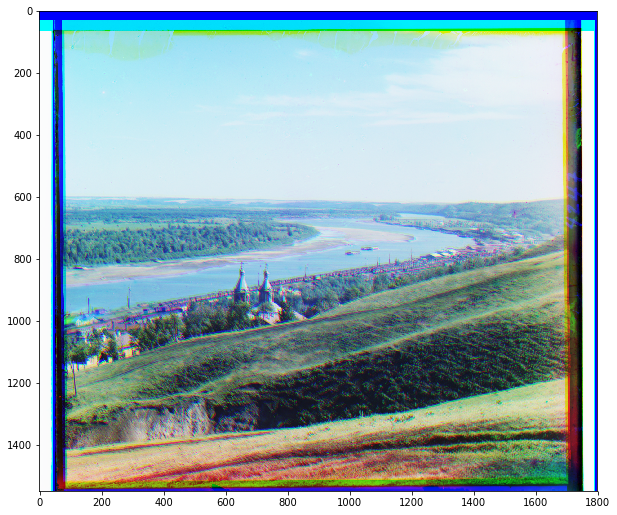

In [7]:
# Task2 pyramid function is above

def offset_cal(im1, im2, level):
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
    sz = im1_gray.shape
    warp_mode = cv2.MOTION_TRANSLATION
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    number_of_iterations = 5000;
    termination_eps = 1e-10;
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,None,1)
    # 2 times for next level
    warp_matrix[0][2] = (2**level) * warp_matrix[0][2]
    warp_matrix[1][2] = (2**level) * warp_matrix[1][2]
    print(cc)
    #im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    #im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
    return warp_matrix

def align_image2(im1,im2, warp_matrix):
    sz = im1.shape
    #print(im1.shape)
    #print(im2.shape)
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
    #print(im2_aligned.shape)
    return im2_aligned

im1_aligned = cv2.cvtColor(gaussian_pyr_1[0],cv2.COLOR_BGR2GRAY)
warp_matrix2 = offset_cal(gaussian_pyr_1[level - 1],gaussian_pyr_2[level - 1], level - 1)
warp_matrix3 = offset_cal(gaussian_pyr_1[level - 1],gaussian_pyr_3[level - 1], level - 1)
#print(gaussian_pyr_2[0].shape)
im2_aligned = align_image2(im1_aligned, gaussian_pyr_2[0],warp_matrix2)
im3_aligned = align_image2(im1_aligned, gaussian_pyr_3[0],warp_matrix3)
#print(im1_aligned.shape,im2_aligned.shape,im3_aligned.shape)
sys_image = cv2.merge((im1_aligned,im2_aligned,im3_aligned))
#sys_image = cv2.merge((im3_aligned, im2_aligned,im1_aligned))
sys_image = cv2.cvtColor(sys_image,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(sys_image,vmin = 0,vmax = 255)
plt.savefig("ff3.jpg",bbox_inches='tight')

4553 1692
(1517, 1692, 3)
(1518, 1692, 3)
(1518, 1692, 3)
0.8342791834774071
0.7259929728487257
(1517, 1692) (1517, 1692) (1517, 1692)
(1517, 1692, 3)


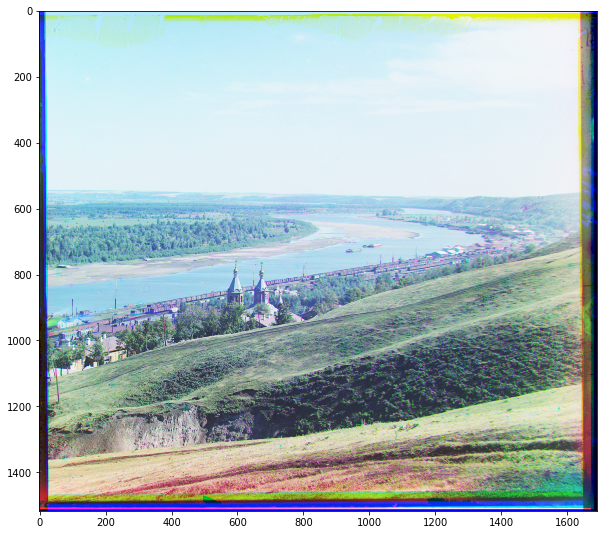

In [8]:
# Task3 using remove border and adjust_gamma algorithm

def align_image3(im1,im2):
    im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
    im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
    sz = im1_gray.shape
    warp_mode = cv2.MOTION_TRANSLATION
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    number_of_iterations = 5000;
    termination_eps = 1e-10;
    # Define termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
    # Run the ECC algorithm. The results are stored in warp_matrix.
    (cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,None,1)
    offset = (warp_matrix[0][2],warp_matrix[1][2])
    print(cc)
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
    im2_aligned = cv2.cvtColor(im2_aligned,cv2.COLOR_BGR2GRAY)
    return im2_aligned


def removeBorder(img):
    rate = 0.01
    y1 = int(rate * len(img))
    y2 = int(len(img)-rate * len(img))
    x1 = int(3 * rate * len(img[0]))
    x2 = int(len(img[0]) - 3 * rate * len(img[0]))
#     y1 = int(100)
#     y2 = int(len(img)-100)
#     x1 = int(100)
#     x2 = int(len(img[0]) - 100)
    return img[y1 : y2, x1 : x2]


def adjust_gamma(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

img = read_img('DataSamples/s6.jpg')
alpha = 1.3 # Simple contrast control
beta = 0    # Simple brightness control
img = removeBorder(img)
h, w, rgb = img.shape
print(h,w)
#plt.imshow(img,cmap = 'gray')
images = []
start_point = 0
for i in range(3):
    #print(i)
    #print(int(start_point + h*i/3))
    images.append(img[0 + start_point:int(h * (i + 1)/3)])
    start_point = int(h * (i + 1) /3)
    print(images[i].shape)
im1_gray = cv2.cvtColor(images[0],cv2.COLOR_BGR2GRAY)
im2_aligned = align_image3(images[0], images[1])
im3_aligned = align_image3(images[0], images[2])
print(im1_gray.shape,im2_aligned.shape,im3_aligned.shape)
im2_aligned = cv2.resize(im2_aligned, (im1_gray.shape[1], im1_gray.shape[0]))
im3_aligned = cv2.resize(im3_aligned, (im1_gray.shape[1], im1_gray.shape[0]))
sys_image = cv2.merge((im1_gray,im2_aligned,im3_aligned))
sys_image = cv2.cvtColor(sys_image,cv2.COLOR_BGR2RGB)
new_image = adjust_gamma(sys_image,1.5)
print(new_image.shape)
plt.figure(figsize = (10,10))
plt.imshow(new_image,vmin = 0,vmax = 255)
plt.savefig("ff6.jpg",bbox_inches='tight')